# Regresión lineal




Ajustaremos con una línea recta a un conjunto de observaciones (de datos discretos) definidos por los puntos:


$$(x_1, y_1), (x_2, y_2), (x_3, y_3), \dots, (x_n, y_n);$$


por lo que, la ecuación de la recta que debe de aproximar el conjunto de datos es:


\begin{equation}
	y = a_0 + a_1 x + e,
\end{equation}


donde $a_0$ y $a_1$ son los coeficiente que representan la intersección con el eje $y$ y la pendiente de la recta, asimismo, $e$ es el error, es decir, la diferencia entre el modelo y las observaciones, entonces:


\begin{equation*}
	e = y - a_0 - a_1x.
\end{equation*}


Entonces la estrategia es minimizar la suma de todos los errores de aproximación con la recta lineal y el valor de la medicion, entonces tenemos la siguiente función por minimizar:


\begin{equation}
	E = \sum_{i = 1}^n e_i^2 = \sum_{i =1}^n \left( y_i - \overline{y}_i \right)^2 = \sum_{i =1}^n \left( y_i - a_0 - a_1 x_i \right)^2,
\end{equation}


Así que los coeficientes del modelo son


\begin{equation}
	\begin{split}
		a_1 & = \frac{n\sum_{i =1}^n y_i x_i  - \left(\sum_{i = 1}^n x_i\right)\left(\sum_{i = 1}^n y_i\right)}{n\sum_{i =1}^n x^2_i - \left(\sum_{i =1}^n x_i \right)^2} \\
		a_0 & = \overline{y} - a_1 \overline{x}
	\end{split}
\end{equation}


Por ultimo describimos el coeficiente de bondad $r^2$


\begin{equation}
	r^2 = \left(\frac{n\sum_{i =1}^n x_i y_i - \left(\sum_{i =1}^n x_i\right)\left(\sum_{i =1}^n y_i\right)}{\sqrt{n\sum_{i =1}x_i^2 - \left(\sum_{i =1}^n x_i\right)^2}\sqrt{n\sum_{i =1}y_i^2 - \left(\sum_{i =1}^n y_i\right)^2}}\right)^2.
\end{equation}

In [1]:
# A fin de facilitar la carga de los datos emplearemos la libreria de pandas
import pandas as pd

# Importamos numpy en caso de ocuparlo
import numpy as np

# Libreria para graficar
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuramos los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importamos la información mediante un archivo en csv
data = pd.read_csv('RegresionL.csv')

# Visualizamos la información
data

,x,y
0,4.0,102.56
1,4.2,113.18
2,4.5,130.11
3,4.7,142.05
4,5.1,167.53
5,5.5,195.14
6,5.9,224.87
7,6.3,256.73
8,6.8,299.50
9,7.1,326.77


In [3]:
# Ahora procederemos a determinar el modelo, por lo que,
# determinamos la longitud de los datos
n = len(data)

In [4]:
# Calculamos la suma de datos en x
data.sum()

x      54.10
y    1958.44
dtype: float64

In [5]:
# Asignamos la suma de 'x' y de 'y'
sumx = data.sum()['x']
sumy = data.sum()['y']

In [6]:
# Calculamos el cuadrado del dataframe
datacuadrado = data ** 2

In [7]:
# Imprimimos el cuadrado
datacuadrado

,x,y
0,16.00,10518.5536
1,17.64,12809.7124
2,20.25,16928.6121
3,22.09,20178.2025
4,26.01,28066.3009
5,30.25,38079.6196
6,34.81,50566.5169
7,39.69,65910.2929
8,46.24,89700.2500
9,50.41,106778.6329


In [8]:
# Asignamos la suma
sumxx = datacuadrado.sum()['x']
sumyy = datacuadrado.sum()['y']

In [9]:
# Calculamos el producto cruzado
data['x'] * data['y']

0     410.240
1     475.356
2     585.495
3     667.635
4     854.403
5    1073.270
6    1326.733
7    1617.399
8    2036.600
9    2320.067
dtype: float64

In [10]:
# Calculamos y asignamos el cuadrado
sumxy = (data['x'] * data['y']).sum()

In [11]:
# Con todos los valores, determinamos los coeficientes
a1 = (n * sumxy - sumx * sumy) / (n * sumxx - sumx ** 2)
a0 = (sumy / n) - a1 * (sumx / n)

# Imprimimos los coeficientes
print('El coeficiente de la pendiente es {} y el de la intersección es {}'.format(a1, a0))

El coeficiente de la pendiente es 72.09240825473908 y el de la intersección es -194.1759286581384


In [12]:
# Ahora calculamos las estimaciones con el modelo
estimados = a0 + a1 * data['x']

# Imprimimos los estimados
print(estimados)

0     94.193704
1    108.612186
2    130.239908
3    144.658390
4    173.495353
5    202.332317
6    231.169280
7    260.006243
8    296.052447
9    317.680170
Name: x, dtype: float64


In [13]:
# Ahora calculamos los errores
E = ((estimados - data['y']) ** 2).sum()

In [14]:
# Estandarizamos el error
S = np.sqrt(E / (n - 2))

# Imprimimos el valor del error estandarizado
print(S)

6.421843512488355


In [15]:
# Calculamos el coeficiente de la bondad
bondad = ((n * sumxy - sumx * sumy) / (np.sqrt(n * sumxx - sumx ** 2) * np.sqrt(n * sumyy - sumy ** 2))) ** 2

# Imprimimos el coeficiente de bondad
print('El coeficiente de bondad es: ', bondad)

El coeficiente de bondad es:  0.9941072950100157


In [16]:
# Ahora sistematizaremos el procedo anterior
def regresionlineal(data):
    
    # Calculamos el numero de datos
    n = len(data)
    
    # Calculamos los coeficientes de las sumas necesarios
    sumx = data.sum()['x']
    sumy = data.sum()['y']
    
    # Asignamos la suma de los cuadrados
    sumxx = datacuadrado.sum()['x']
    sumyy = datacuadrado.sum()['y']
    
    # Asignamos la suma cruzada
    sumxy = (data['x'] * data['y']).sum()
    
    # Calculamos los coeficientes
    a1 = (n * sumxy - sumx * sumy) / (n * sumxx - sumx ** 2)
    a0 = (sumy / n) - a1 * (sumx / n)
    
    # Imprimimos los coeficientes
    print('El coeficiente de la pendiente es {} y el de la intersección es {}'.format(a1, a0))
    
    # Ahora calculamos las estimaciones con el modelo
    estimados = a0 + a1 * data['x']
    
    # Ahora calculamos los errores
    E = ((estimados - data['y']) ** 2).sum()
    
    # Estandarizamos el error
    S = np.sqrt(E / (n - 2))
    
    # Imprimimos el valor del error estandarizado
    print('El error estandarizado del modelo de regresion lineal es: ',S)
    
    # Calculamos el coeficiente de la bondad
    bondad = ((n * sumxy - sumx * sumy) / (np.sqrt(n * sumxx - sumx ** 2) * np.sqrt(n * sumyy - sumy ** 2))) ** 2

    # Imprimimos el coeficiente de bondad
    print('El coeficiente de bondad es: ', bondad)
    
    return a0, a1, S, bondad

In [17]:
# Llamamos los datos
a0, a1, S, bondad = regresionlineal(data)

El coeficiente de la pendiente es 72.09240825473908 y el de la intersección es -194.1759286581384
El error estandarizado del modelo de regresion lineal es:  6.421843512488355
El coeficiente de bondad es:  0.9941072950100157


In [18]:
# Ahora analizaremos como se efectua de forma directa con el código de python

# Importamos la libreria de modelos estadisticos
import statsmodels.api as sm

In [19]:
# Asignamos las variables
x = data[['x']]
y = data['y']

# Variable para predecir
x1 = data[['x']]

# Agregamos una constante al conjunto x
x = sm.add_constant(x, prepend = True)

# Ajustamos el modelo
modelo = sm.OLS(y,x)

# Ajustamos el modelo
modelo = modelo.fit()

# Imprimimos el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1350.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           3.30e-10
Time:                        14:52:33   Log-Likelihood:                -31.671
No. Observations:                  10   AIC:                             67.34
Df Residuals:                       8   BIC:                             67.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -194.1759     10.809    -17.964      0.0

In [20]:
# Imprimimos los coeficientes del modelo
print("Coeficiente de intersección: ", modelo.params[0]) # Pendiente 
print("Coeficiente de la pendiente: ", modelo.params[1]) # coeficiente de la intersección 

Coeficiente de intersección:  -194.17592865813765
Coeficiente de la pendiente:  72.09240825473894


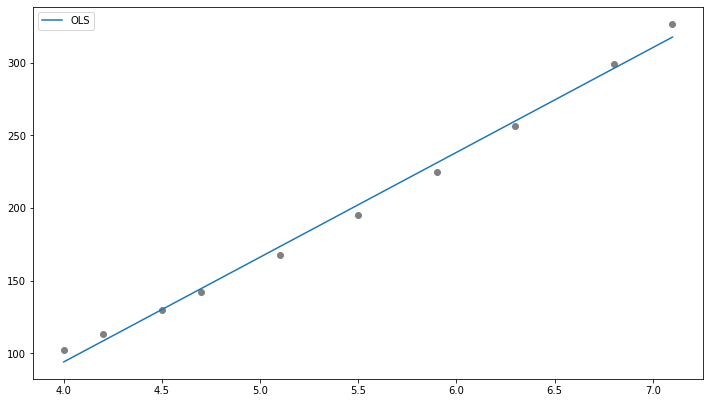

In [21]:
 # Predicciones con intervalo de confianza del 85%
# ============================================================================== 
predicciones = modelo.get_prediction(x).summary_frame(alpha=0.15)
predicciones['x'] = x1
predicciones['y'] = y
predicciones = predicciones.sort_values('x')
# Gráfico del modelo
# ============================================================================== 
fig, ax = plt.subplots(figsize = (12, 6.84))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
# ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="85% CI")
# ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
#ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();